## What is Feature Engineering

Data comes in many formats: raw, unstructured, bad, incomplete, or large. Therefore, transformations and procedures are needed to get actionable data to model, analyze, or get insights for a business unit.

<img src='mental_map.png'/>

After we have the raw data into a tidy standard, we can then start performing feature engineering. A feature is known to be a variable or a characteristic of the observation we want to model or analyze.

## Why Python?

<img src='intro.png'/>

## Anaconda Distribution

<img src='conda_envs.png'/>

## Loading Libraries

In [3]:
import numpy as np
import pandas as pd

## Import Data

In [4]:
rating = pd.read_csv('rating_final.csv')
users = pd.read_csv('userprofile.csv')

In [5]:
print('Rating dataset shape:', rating.shape)
rating.head()

Rating dataset shape: (1161, 5)


,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [6]:
print('Users dataset shape:', users.shape)
users.head()

Users dataset shape: (138, 19)


,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [7]:
df = rating.merge(users, how = 'left', on = 'userID')

In [8]:
print('Final dataset shape:', df.shape)
df.head()

Final dataset shape: (1161, 23)


,userID,placeID,rating,food_rating,service_rating,latitude,longitude,smoker,drink_level,dress_preference,...,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1077,135085,2,2,2,22.156469,-100.985540,false,social drinker,elegant,...,kids,1987,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71
1,U1077,135038,2,2,1,22.156469,-100.985540,false,social drinker,elegant,...,kids,1987,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71
2,U1077,132825,2,2,2,22.156469,-100.985540,false,social drinker,elegant,...,kids,1987,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71
3,U1077,135060,1,2,2,22.156469,-100.985540,false,social drinker,elegant,...,kids,1987,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71
4,U1068,135104,1,1,2,23.752269,-99.168605,false,casual drinker,informal,...,independent,1988,technology,thrifty-protector,Catholic,student,blue,72,low,1.57


In [9]:
df.describe() #resumen solo para variables numericas. summary y glimpse si nos da variables categoricas.

,placeID,rating,food_rating,service_rating,latitude,longitude,birth_year,weight,height
count,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000
mean,134192.041344,1.199828,1.215332,1.090439,21.893060,-100.496817,1983.934539,63.241171,1.662842
std,1100.916275,0.773282,0.792294,0.790844,1.308759,0.788721,16.305780,16.221539,0.135386
min,132560.000000,0.000000,0.000000,0.000000,18.813348,-101.054680,1930.000000,40.000000,1.200000
25%,132856.000000,1.000000,1.000000,0.000000,22.138127,-100.984268,1987.000000,52.000000,1.600000
50%,135030.000000,1.000000,1.000000,1.000000,22.150891,-100.947888,1989.000000,64.000000,1.690000
75%,135059.000000,2.000000,2.000000,2.000000,22.177726,-99.250000,1991.000000,70.000000,1.750000
max,135109.000000,2.000000,2.000000,2.000000,23.771030,-99.067106,1994.000000,120.000000,2.000000


## 1. Missing Data

A review of techniques for treating missing data in OM survey research

by Nikos Tsikriktsis

<img src='paper.png'/>

* NA
* NULL
* blank
* 0, 99, 999

Are NA and <blank> the same?
Can we handle missing data as part of the test set?
Some ML, DL... algorithms drop NA values… some give errors

### Dealing with missing data

Finding NAs in the dataset

In [10]:
df.isna().sum() #or df.isnull().sum() cuantos valores son NA

userID              0
placeID             0
rating              0
food_rating         0
service_rating      0
latitude            0
longitude           0
smoker              0
drink_level         0
dress_preference    0
ambience            0
transport           0
marital_status      0
hijos               0
birth_year          0
interest            0
personality         0
religion            0
activity            0
color               0
weight              0
budget              0
height              0
dtype: int64

In [11]:
np.unique(df['smoker'])   #para ver todos los unicos de smokers 

array(['?', 'false', 'true'], dtype=object)

In [12]:
cols = []
val = []
for col in df.select_dtypes(include='object').columns:
    cols.append(col)
    val.append(df[col].str.contains(r'\?').sum())
pd.DataFrame({
    'cols':cols,
    'val':val
})

,cols,val
0,userID,0
1,smoker,31
2,drink_level,0
3,dress_preference,51
4,ambience,58
5,transport,54
6,marital_status,40
7,hijos,98
8,interest,0
9,personality,0


We need to change the **?** into a **NaN** value

In [13]:
df.replace(r'\?', np.nan, regex = True, inplace = True) #np.where

Checking again for missing values

In [14]:
df.isna().sum()

userID               0
placeID              0
rating               0
food_rating          0
service_rating       0
latitude             0
longitude            0
smoker              31
drink_level          0
dress_preference    51
ambience            58
transport           54
marital_status      40
hijos               98
birth_year           0
interest             0
personality          0
religion             0
activity            53
color                0
weight               0
budget              69
height               0
dtype: int64

### 1.1 Deletion

### Listwise

<img src='listwise.png'/>

In [15]:
df.dropna().shape

(997, 23)

### Pairwise

<img src='corr.png'/>

In [16]:
df.corr()

,placeID,rating,food_rating,service_rating,latitude,longitude,birth_year,weight,height
placeID,1.000000,0.073768,0.011680,0.059236,-0.226728,-0.212708,-0.065294,-0.169660,-0.090682
rating,0.073768,1.000000,0.714855,0.690757,-0.122537,-0.046466,-0.134949,-0.069134,0.017379
food_rating,0.011680,0.714855,1.000000,0.647177,-0.068943,-0.007731,-0.122824,-0.036307,0.013336
service_rating,0.059236,0.690757,0.647177,1.000000,-0.083278,-0.053349,-0.122814,-0.034898,0.031252
latitude,-0.226728,-0.122537,-0.068943,-0.083278,1.000000,-0.332118,0.199679,0.107755,0.052327
longitude,-0.212708,-0.046466,-0.007731,-0.053349,-0.332118,1.000000,-0.056088,0.151532,0.024248
birth_year,-0.065294,-0.134949,-0.122824,-0.122814,0.199679,-0.056088,1.000000,0.189881,0.292179
weight,-0.169660,-0.069134,-0.036307,-0.034898,0.107755,0.151532,0.189881,1.000000,0.500988
height,-0.090682,0.017379,0.013336,0.031252,0.052327,0.024248,0.292179,0.500988,1.000000


In [17]:
df[['rating', 'food_rating']].corr()

,rating,food_rating
rating,1.000000,0.714855
food_rating,0.714855,1.000000


### 1.2 Filling and dropping values

**Filling Values**

* Fill values with information available (time series for example)
* Nearest Neighbor Imputation (NNI) - surveys - distance minimization
* KNN models

**Advantages:** Not losing observations.

**Disadvantages:** Missing the target.

<img src='fill.png'/>

In [18]:
df.iloc[380:390] #filtro 

,userID,placeID,rating,food_rating,service_rating,latitude,longitude,smoker,drink_level,dress_preference,...,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
380,U1115,135108,1,2,2,22.138127,-100.920512,true,social drinker,elegant,...,independent,1990,variety,hard-worker,Catholic,student,green,76,low,1.76
381,U1115,135069,1,0,1,22.138127,-100.920512,true,social drinker,elegant,...,independent,1990,variety,hard-worker,Catholic,student,green,76,low,1.76
382,U1115,132830,2,2,2,22.138127,-100.920512,true,social drinker,elegant,...,independent,1990,variety,hard-worker,Catholic,student,green,76,low,1.76
383,U1115,135070,1,1,1,22.138127,-100.920512,true,social drinker,elegant,...,independent,1990,variety,hard-worker,Catholic,student,green,76,low,1.76
384,U1115,135071,2,2,2,22.138127,-100.920512,true,social drinker,elegant,...,independent,1990,variety,hard-worker,Catholic,student,green,76,low,1.76
385,U1072,135000,0,0,0,18.868260,-99.212033,false,casual drinker,no preference,...,independent,1984,eco-friendly,thrifty-protector,Christian,student,red,50,medium,1.54
386,U1024,132834,1,1,1,22.154021,-100.976028,NaN,abstemious,NaN,...,NaN,1930,none,hard-worker,none,NaN,yellow,40,NaN,1.20
387,U1024,135106,1,1,1,22.154021,-100.976028,NaN,abstemious,NaN,...,NaN,1930,none,hard-worker,none,NaN,yellow,40,NaN,1.20
388,U1024,135042,1,2,1,22.154021,-100.976028,NaN,abstemious,NaN,...,NaN,1930,none,hard-worker,none,NaN,yellow,40,NaN,1.20
389,U1024,132825,1,1,0,22.154021,-100.976028,NaN,abstemious,NaN,...,NaN,1930,none,hard-worker,none,NaN,yellow,40,NaN,1.20


In [19]:
df.fillna(method='ffill').iloc[380:390]

,userID,placeID,rating,food_rating,service_rating,latitude,longitude,smoker,drink_level,dress_preference,...,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
380,U1115,135108,1,2,2,22.138127,-100.920512,true,social drinker,elegant,...,independent,1990,variety,hard-worker,Catholic,student,green,76,low,1.76
381,U1115,135069,1,0,1,22.138127,-100.920512,true,social drinker,elegant,...,independent,1990,variety,hard-worker,Catholic,student,green,76,low,1.76
382,U1115,132830,2,2,2,22.138127,-100.920512,true,social drinker,elegant,...,independent,1990,variety,hard-worker,Catholic,student,green,76,low,1.76
383,U1115,135070,1,1,1,22.138127,-100.920512,true,social drinker,elegant,...,independent,1990,variety,hard-worker,Catholic,student,green,76,low,1.76
384,U1115,135071,2,2,2,22.138127,-100.920512,true,social drinker,elegant,...,independent,1990,variety,hard-worker,Catholic,student,green,76,low,1.76
385,U1072,135000,0,0,0,18.868260,-99.212033,false,casual drinker,no preference,...,independent,1984,eco-friendly,thrifty-protector,Christian,student,red,50,medium,1.54
386,U1024,132834,1,1,1,22.154021,-100.976028,false,abstemious,no preference,...,independent,1930,none,hard-worker,none,student,yellow,40,medium,1.20
387,U1024,135106,1,1,1,22.154021,-100.976028,false,abstemious,no preference,...,independent,1930,none,hard-worker,none,student,yellow,40,medium,1.20
388,U1024,135042,1,2,1,22.154021,-100.976028,false,abstemious,no preference,...,independent,1930,none,hard-worker,none,student,yellow,40,medium,1.20
389,U1024,132825,1,1,0,22.154021,-100.976028,false,abstemious,no preference,...,independent,1930,none,hard-worker,none,student,yellow,40,medium,1.20


Now, for dropping a column, we can choose a threshold. If % of NAs are higher than the threshold then we remove the column.

In [20]:
pct = pd.DataFrame(df.isna().sum()/df.shape[0], columns = ['pct']).reset_index()
pct

,index,pct
0,userID,0.000000
1,placeID,0.000000
2,rating,0.000000
3,food_rating,0.000000
4,service_rating,0.000000
5,latitude,0.000000
6,longitude,0.000000
7,smoker,0.026701
8,drink_level,0.000000
9,dress_preference,0.043928


**Dropping Values**

* Dropping features lower than a threshold (70% for example)

**Advantages:** Not using features with many NA. Can alter our model.

**Disadvantages:** Losing information

In [21]:
threshold = 0.70
cols_keep = pct[pct['pct']<threshold]['index'].values
cols_keep

array(['userID', 'placeID', 'rating', 'food_rating', 'service_rating',
       'latitude', 'longitude', 'smoker', 'drink_level',
       'dress_preference', 'ambience', 'transport', 'marital_status',
       'hijos', 'birth_year', 'interest', 'personality', 'religion',
       'activity', 'color', 'weight', 'budget', 'height'], dtype=object)

In [22]:
df[cols_keep]

,userID,placeID,rating,food_rating,service_rating,latitude,longitude,smoker,drink_level,dress_preference,...,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1077,135085,2,2,2,22.156469,-100.985540,false,social drinker,elegant,...,kids,1987,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71
1,U1077,135038,2,2,1,22.156469,-100.985540,false,social drinker,elegant,...,kids,1987,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71
2,U1077,132825,2,2,2,22.156469,-100.985540,false,social drinker,elegant,...,kids,1987,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71
3,U1077,135060,1,2,2,22.156469,-100.985540,false,social drinker,elegant,...,kids,1987,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71
4,U1068,135104,1,1,2,23.752269,-99.168605,false,casual drinker,informal,...,independent,1988,technology,thrifty-protector,Catholic,student,blue,72,low,1.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,U1043,132630,1,1,1,23.771030,-99.167082,false,abstemious,no preference,...,independent,1989,technology,hard-worker,none,student,white,60,medium,1.64
1157,U1011,132715,1,1,0,23.724972,-99.152856,false,abstemious,no preference,...,independent,1989,variety,hard-worker,Catholic,student,purple,68,medium,1.78
1158,U1068,132733,1,1,0,23.752269,-99.168605,false,casual drinker,informal,...,independent,1988,technology,thrifty-protector,Catholic,student,blue,72,low,1.57
1159,U1068,132594,1,1,1,23.752269,-99.168605,false,casual drinker,informal,...,independent,1988,technology,thrifty-protector,Catholic,student,blue,72,low,1.57


### 1.3 Imputations

* Mean: maintains the average of each feature
* Mode: most repeated value (stats change)
* Median: median value (stats change)
* Constant: Adding a constant to all missing values (stats changes but functions become available without na.rm)

There are some ways of imputing a variable. Some of them are:
* Base python: finding NAs and then assign a forced value (mean, median, constant)
* scipy: finding NAs and then assign a forced value (mode: categorical)
* sklearn: apply sklearn function with a specific strategy

Base python

In [23]:
df[df['weight'].isna()]['weight'] = df['weight'].mean()

Scipy

In [24]:
from scipy import stats

In [25]:
stats.mode(df['smoker'])

ModeResult(mode=array(['false'], dtype=object), count=array([907]))

Sklearn

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [28]:
imp_mean.fit_transform(df[['weight']]) #df['new']=array

array([[65.],
       [65.],
       [65.],
       ...,
       [72.],
       [72.],
       [72.]])

In [29]:
imp_mode.fit_transform(df[['smoker']])

array([['false'],
       ['false'],
       ['false'],
       ...,
       ['false'],
       ['false'],
       ['false']], dtype=object)

Now, if we want sectorized imputations, we need to create a **dictionary** or use **pd.cut()** function

* Using mean/mode/median or 0 imputation by feature.
* Mode is needed for categorical features

Disadvantage: Data is now highly biased

In [30]:
#For Smokers by Drink Level and Personality
dic_smoker = pd.DataFrame(df.groupby(['drink_level', 'personality'])['smoker'].agg(lambda x:x.value_counts().index[0])) \
    .reset_index()
dic_smoker.columns = ['drink_level', 'personality', 'smoker_new']
dic_smoker

,drink_level,personality,smoker_new
0,abstemious,conformist,false
1,abstemious,hard-worker,false
2,abstemious,hunter-ostentatious,false
3,abstemious,thrifty-protector,false
4,casual drinker,conformist,true
5,casual drinker,hard-worker,false
6,casual drinker,hunter-ostentatious,false
7,casual drinker,thrifty-protector,false
8,social drinker,conformist,true
9,social drinker,hard-worker,false


In [31]:
df = df.merge(dic_smoker, how = 'left', on = ['drink_level', 'personality'])
df['smoker_new_2'] = np.where(df['smoker'].isna(), df['smoker_new'], df['smoker'])

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/luispedro./opt/anaconda3/envs/basereal_sql/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='smoker', ylabel='count'>

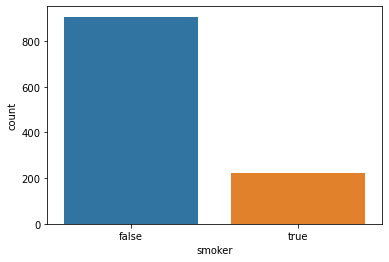

In [33]:
sns.countplot(df[df['smoker'].notna()]['smoker'])

/Users/luispedro./opt/anaconda3/envs/basereal_sql/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='smoker_new', ylabel='count'>

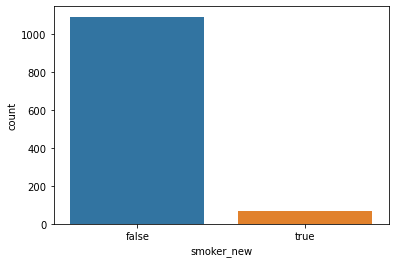

In [34]:
sns.countplot(df['smoker_new'])

/Users/luispedro./opt/anaconda3/envs/basereal_sql/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='smoker_new_2', ylabel='count'>

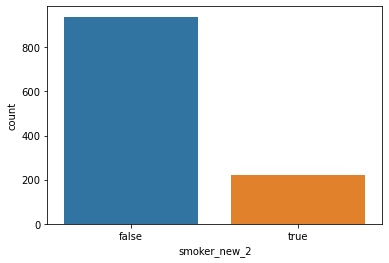

In [35]:
sns.countplot(df['smoker_new_2'])

### 1.4 Predictive Models

Predictive models are used to choose the best approximation for a missing value.

Numerical features:
* Linear regression
* Multidimensional regression

Categorial features:
* K-Nearest neighbors (KNN)
* Support vector machines (SVM)
* Logistic regression


***Linear Model Example***

<img src='lm.png'/>

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()
lm = lm.fit(df[['height']], df['weight'])
lm

LinearRegression()

In [38]:
df['weight_lm'] = lm.predict(df[['height']])

Weight avg without prediction: 63.24


/Users/luispedro./opt/anaconda3/envs/basereal_sql/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight', ylabel='Density'>

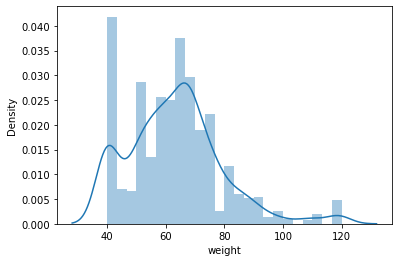

In [39]:
print('Weight avg without prediction:', round(df['weight'].mean(),2))
sns.distplot(df['weight'])

Weight avg after prediction: 63.24
y_hat = -36.57 + 60.03x


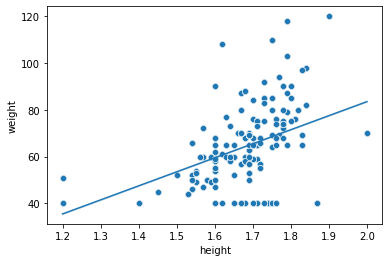

/Users/luispedro./opt/anaconda3/envs/basereal_sql/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


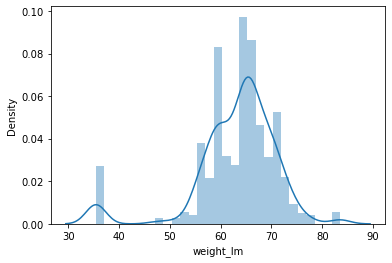

In [40]:
print('Weight avg after prediction:', round(df['weight_lm'].mean(),2))
print('y_hat = ', round(lm.intercept_,2), ' + ', round(lm.coef_[0],2), 'x', sep = '')
sns.scatterplot(x = df['height'], y = df['weight'])
sns.lineplot(x = df['height'], y = lm.intercept_ + (lm.coef_ * df['height']))
plt.ylabel('weight')
plt.show()
sns.distplot(df['weight_lm'])
plt.show()

## 2. Outliers

### 2.1 Standard Deviation Approach

All values with a distance to the average of **factor * standard deviation** are assumed to be outliers.

How we choose a factor? (2-4 recommended) ***We can also use Z value***

We can drop the Outliers from our data or we can “Cap” those values. For the observations with a value under the lower limit, we use the lower limit instead; the same for the upper values.

$$
x_{l} = \mu_{var} - \sigma_{var}x_{i} \\
x_{u} = \mu_{var} + \sigma_{var}x_{i}
$$

In [41]:
f = 2
xl = df['weight'].mean() - (df['weight'].std() * f)
xu = df['weight'].mean() + (df['weight'].std() * f)
print('Lower value:', xl)
print('Upper value:', xu)

Lower value: 30.798092762318127
Upper value: 95.68425004560606


<AxesSubplot:xlabel='userID', ylabel='weight'>

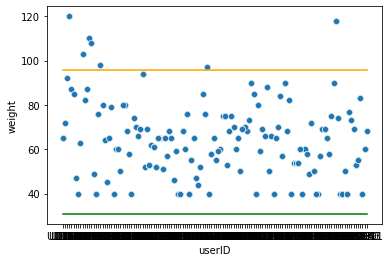

In [42]:
sns.scatterplot(x = df['userID'], y = df['weight'])
sns.lineplot(x = df['userID'], y = xl, color = 'green')
sns.lineplot(x = df['userID'], y = xu, color = 'orange')

If you want to delete every observation containing an outlier:

In [43]:
df_sd = df[(df['weight']>=xl) & (df['weight']<=xu)]

In [44]:
df_sd[['weight']].describe()

,weight
count,1117.000000
mean,61.391226
std,13.423687
min,40.000000
25%,52.000000
50%,62.000000
75%,70.000000
max,94.000000


Now we need to ***cap*** the values in the limits

In [45]:
df['weight_sd'] = np.where(
    df['weight']<xl,
    xl,
    np.where(
        df['weight']>xu,
        xu,
        df['weight']
    )
)

In [46]:
df[['weight', 'weight_sd']].describe()

,weight,weight_sd
count,1161.000000,1161.000000
mean,63.241171,62.690876
std,16.221539,14.706365
min,40.000000,40.000000
25%,52.000000,52.000000
50%,64.000000,64.000000
75%,70.000000,70.000000
max,120.000000,95.684250


### 2.2 Percentile Approach

Percentiles do take into account the distribution minimum values, while standard deviation don't.

In [47]:
pl = np.percentile(df['weight'], 5)
pu = np.percentile(df['weight'], 95)

<AxesSubplot:xlabel='userID', ylabel='weight'>

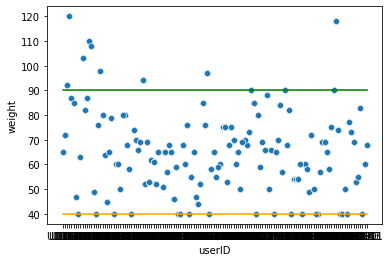

In [48]:
sns.scatterplot(x = df['userID'], y = df['weight'])
sns.lineplot(x = df['userID'], y = pl, color = 'orange')
sns.lineplot(x = df['userID'], y = pu, color = 'green')

For deleting all observations:

In [49]:
df_sd = df[(df['weight']>=pl) & (df['weight']<=pu)]

In [50]:
df_sd[['weight']].describe()

,weight
count,1106.000000
mean,61.077758
std,13.114577
min,40.000000
25%,52.000000
50%,61.500000
75%,69.000000
max,90.000000


In [51]:
df['weight_pct'] = np.where(
    df['weight']<pl,
    pl,
    np.where(
        df['weight']>pu,
        pu,
        df['weight']
    )
)

In [52]:
df[['weight', 'weight_sd', 'weight_pct']].describe()

,weight,weight_sd,weight_pct
count,1161.000000,1161.000000,1161.000000
mean,63.241171,62.690876,62.447890
std,16.221539,14.706365,14.199293
min,40.000000,40.000000,40.000000
25%,52.000000,52.000000,52.000000
50%,64.000000,64.000000,64.000000
75%,70.000000,70.000000,70.000000
max,120.000000,95.684250,90.000000


## 3. Normalization

<img src='sklearn_preprocessing.png'/>

### 3.1 Standarization (Z Value)

<img src='standarization.png'/>

$$
z = \frac{x - \mu}{\sigma}
$$

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
df_z = df.copy()
for col in df_z.select_dtypes(include=['float', 'int']).columns:
    df_z[col+'_z'] = scaler.fit_transform(df_z[[col]])

In [55]:
df_z.head()

,userID,placeID,rating,food_rating,service_rating,latitude,longitude,smoker,drink_level,dress_preference,...,food_rating_z,service_rating_z,latitude_z,longitude_z,birth_year_z,weight_z,height_z,weight_lm_z,weight_sd_z,weight_pct_z
0,U1077,135085,2,2,2,22.156469,-100.985540,false,social drinker,elegant,...,0.990802,1.150609,0.201353,-0.619906,0.188079,0.108472,0.348470,0.348470,0.157083,0.179812
1,U1077,135038,2,2,1,22.156469,-100.985540,false,social drinker,elegant,...,0.990802,-0.114407,0.201353,-0.619906,0.188079,0.108472,0.348470,0.348470,0.157083,0.179812
2,U1077,132825,2,2,2,22.156469,-100.985540,false,social drinker,elegant,...,0.990802,1.150609,0.201353,-0.619906,0.188079,0.108472,0.348470,0.348470,0.157083,0.179812
3,U1077,135060,1,2,2,22.156469,-100.985540,false,social drinker,elegant,...,0.990802,1.150609,0.201353,-0.619906,0.188079,0.108472,0.348470,0.348470,0.157083,0.179812
4,U1068,135104,1,1,2,23.752269,-99.168605,false,casual drinker,informal,...,-0.271899,1.150609,1.421201,1.684732,0.249434,0.540183,-0.686057,-0.686057,0.633272,0.673007


In [56]:
df_z.describe()

,placeID,rating,food_rating,service_rating,latitude,longitude,birth_year,weight,height,weight_lm,...,food_rating_z,service_rating_z,latitude_z,longitude_z,birth_year_z,weight_z,height_z,weight_lm_z,weight_sd_z,weight_pct_z
count,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,...,1.161000e+03,1.161000e+03,1.161000e+03,1.161000e+03,1.161000e+03,1.161000e+03,1.161000e+03,1.161000e+03,1.161000e+03,1.161000e+03
mean,134192.041344,1.199828,1.215332,1.090439,21.893060,-100.496817,1983.934539,63.241171,1.662842,63.241171,...,4.603457e-16,2.082744e-16,-1.540351e-15,4.678046e-16,-4.145072e-15,2.570439e-16,-5.096890e-16,5.506171e-16,-7.238922e-16,-1.694501e-16
std,1100.916275,0.773282,0.792294,0.790844,1.308759,0.788721,16.305780,16.221539,0.135386,8.126799,...,1.000431e+00,1.000431e+00,1.000431e+00,1.000431e+00,1.000431e+00,1.000431e+00,1.000431e+00,1.000431e+00,1.000431e+00,1.000431e+00
min,132560.000000,0.000000,0.000000,0.000000,18.813348,-101.054680,1930.000000,40.000000,1.200000,35.458157,...,-1.534601e+00,-1.379424e+00,-2.354169e+00,-7.076051e-01,-3.309120e+00,-1.433353e+00,-3.420164e+00,-3.420164e+00,-1.543594e+00,-1.581597e+00
25%,132856.000000,1.000000,1.000000,0.000000,22.138127,-100.984268,1987.000000,52.000000,1.600000,59.468935,...,-2.718995e-01,-1.379424e+00,1.873318e-01,-6.182930e-01,1.880794e-01,-6.932767e-01,-4.643725e-01,-4.643725e-01,-7.272690e-01,-7.361206e-01
50%,135030.000000,1.000000,1.000000,1.000000,22.150891,-100.947888,1989.000000,64.000000,1.690000,64.871361,...,-2.718995e-01,-1.144072e-01,1.970888e-01,-5.721478e-01,3.107882e-01,4.679923e-02,2.006807e-01,2.006807e-01,8.905588e-02,1.093561e-01
75%,135059.000000,2.000000,2.000000,2.000000,22.177726,-99.250000,1991.000000,70.000000,1.750000,68.472977,...,9.908017e-01,1.150609e+00,2.176018e-01,1.581489e+00,4.334969e-01,4.168372e-01,6.440495e-01,6.440495e-01,4.972183e-01,5.320944e-01
max,135109.000000,2.000000,2.000000,2.000000,23.771030,-99.067106,1994.000000,120.000000,2.000000,83.479714,...,9.908017e-01,1.150609e+00,1.435542e+00,1.813476e+00,6.175600e-01,3.500487e+00,2.491419e+00,2.491419e+00,2.244443e+00,1.941222e+00


### 3.2 Min Max Scaler

<img src='min_max_scale.png'/>

<img src='poorly_scaled.png'/>

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()
df_norm = df.copy()
for col in df_norm.select_dtypes(include=['float', 'int']).columns:
    df_norm[col+'_norm'] = scaler.fit_transform(df_norm[[col]])

In [59]:
df_norm.head()

,userID,placeID,rating,food_rating,service_rating,latitude,longitude,smoker,drink_level,dress_preference,...,food_rating_norm,service_rating_norm,latitude_norm,longitude_norm,birth_year_norm,weight_norm,height_norm,weight_lm_norm,weight_sd_norm,weight_pct_norm
0,U1077,135085,2,2,2,22.156469,-100.985540,false,social drinker,elegant,...,1.0,1.0,0.674331,0.034786,0.890625,0.3125,0.6375,0.6375,0.448960,0.50
1,U1077,135038,2,2,1,22.156469,-100.985540,false,social drinker,elegant,...,1.0,0.5,0.674331,0.034786,0.890625,0.3125,0.6375,0.6375,0.448960,0.50
2,U1077,132825,2,2,2,22.156469,-100.985540,false,social drinker,elegant,...,1.0,1.0,0.674331,0.034786,0.890625,0.3125,0.6375,0.6375,0.448960,0.50
3,U1077,135060,1,2,2,22.156469,-100.985540,false,social drinker,elegant,...,1.0,1.0,0.674331,0.034786,0.890625,0.3125,0.6375,0.6375,0.448960,0.50
4,U1068,135104,1,1,2,23.752269,-99.168605,false,casual drinker,informal,...,0.5,1.0,0.996216,0.948933,0.906250,0.4000,0.4625,0.4625,0.574669,0.64


In [60]:
df_norm.describe()

,placeID,rating,food_rating,service_rating,latitude,longitude,birth_year,weight,height,weight_lm,...,food_rating_norm,service_rating_norm,latitude_norm,longitude_norm,birth_year_norm,weight_norm,height_norm,weight_lm_norm,weight_sd_norm,weight_pct_norm
count,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,...,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000
mean,134192.041344,1.199828,1.215332,1.090439,21.893060,-100.496817,1983.934539,63.241171,1.662842,63.241171,...,0.607666,0.545220,0.621200,0.280675,0.842727,0.290515,0.578553,0.578553,0.407492,0.448958
std,1100.916275,0.773282,0.792294,0.790844,1.308759,0.788721,16.305780,16.221539,0.135386,8.126799,...,0.396147,0.395422,0.263986,0.396826,0.254778,0.202769,0.169232,0.169232,0.264103,0.283986
min,132560.000000,0.000000,0.000000,0.000000,18.813348,-101.054680,1930.000000,40.000000,1.200000,35.458157,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,132856.000000,1.000000,1.000000,0.000000,22.138127,-100.984268,1987.000000,52.000000,1.600000,59.468935,...,0.500000,0.000000,0.670632,0.035426,0.890625,0.150000,0.500000,0.500000,0.215501,0.240000
50%,135030.000000,1.000000,1.000000,1.000000,22.150891,-100.947888,1989.000000,64.000000,1.690000,64.871361,...,0.500000,0.500000,0.673206,0.053730,0.921875,0.300000,0.612500,0.612500,0.431002,0.480000
75%,135059.000000,2.000000,2.000000,2.000000,22.177726,-99.250000,1991.000000,70.000000,1.750000,68.472977,...,1.000000,1.000000,0.678619,0.907981,0.953125,0.375000,0.687500,0.687500,0.538752,0.600000
max,135109.000000,2.000000,2.000000,2.000000,23.771030,-99.067106,1994.000000,120.000000,2.000000,83.479714,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
